# Df + Lib

In [1]:
# for recall df that we need from other fils
%store -r merge_unique_numain_df 
%store -r dizio_main

In [2]:
# LIBRARIES USED

# import for SVM
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# basics
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns

#test,train
from sklearn.model_selection import train_test_split

#balance dataset
#! pip install imblearn
from imblearn.over_sampling import SMOTE

# reduction technique
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Check df

In [3]:
merge_unique_numain_df.head(1)

,Performer,Song,spotify_genre,spotify_track_duration_minute,spotify_track_explicit,spotify_track_album,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,maingenere,User
SongID,,,,,,,,,,,,,,,,,,,,,
-twistin'-White Silver SandsBill Black's Combo,Bill Black's Combo,-twistin'-White Silver Sands,[],3.43,unknown,single,0.59,0.57,5.37,-9.97,...,0.07,0.4,0.08,0.2,0.63,117.76,3.89,22.16,2,2


In [4]:
merge_unique_numain_df.maingenere.value_counts()

maingenere
0     7546
1     5156
2     4163
3     2499
4     2227
5     2195
6      602
7      404
8      397
9      351
10     346
11     307
12     304
13     240
14     178
15     156
16     136
Name: count, dtype: int64

# **SVM**

the goal of the application of this model is to classify the songs based on the maingenre

In [5]:
features = ['spotify_track_duration_minute', 'danceability', 'energy', 'loudness','mode', 'speechiness', 'acousticness', 'maingenere',
    'spotify_track_popularity', 'instrumentalness', 'liveness']

target = ['maingenere']

x = merge_unique_numain_df[features]
y = merge_unique_numain_df[target]

#display(x)
#display(y)

In [6]:
# we standardize the features 
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [7]:
# split the data set
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [8]:
#display(x_train)
#display(y_test['maingenere'].value_counts())

In [9]:
# try with the first SVM
svm = SVC(kernel='rbf',C=1) 
# we use the RADIAL BASICS FUNTION as a kernel
# C is our regualization parameter

# we initialize the SVM
svm.fit(x_train, y_train)

c:\Users\lovoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1)

In [10]:
# in order to make prediction 
y_pred=svm.predict(x_test)

In [11]:
# from this we obtain the result of our classification 
print(classification_report(y_test, y_pred, target_names=dizio_main))

              precision    recall  f1-score   support

         pop       1.00      0.99      0.99      1491
        rock       0.99      0.98      0.99      1040
       other       0.95      0.99      0.97       818
        soul       0.98      0.96      0.97       523
         rap       0.97      0.98      0.98       437
     country       0.98      0.98      0.98       463
       disco       0.81      0.92      0.86       133
        jazz       0.74      0.59      0.66        86
       blues       0.73      0.75      0.74        69
        funk       0.78      0.78      0.78        74
       dance       0.82      0.74      0.78        61
       metal       0.91      0.81      0.86        52
        folk       0.84      0.82      0.83        57
       house       0.71      0.81      0.76        48
       indie       0.73      0.59      0.65        41
         r&b       0.64      0.56      0.60        25
       latin       0.74      0.83      0.78        24

    accuracy              

From this we see that our **model perform very well with the class that have a lot of observation** like (pop, rock, other, soul, rap and country).


On the other hands when we have less observation the classification perform less well (indie, r&b and latin).

We can also notice the macro avg that underline the fact that the small classes are the one that are classfy less good.


## Confusion Matrix

we use it in orfer to see the quantity of miss classification per maingenre

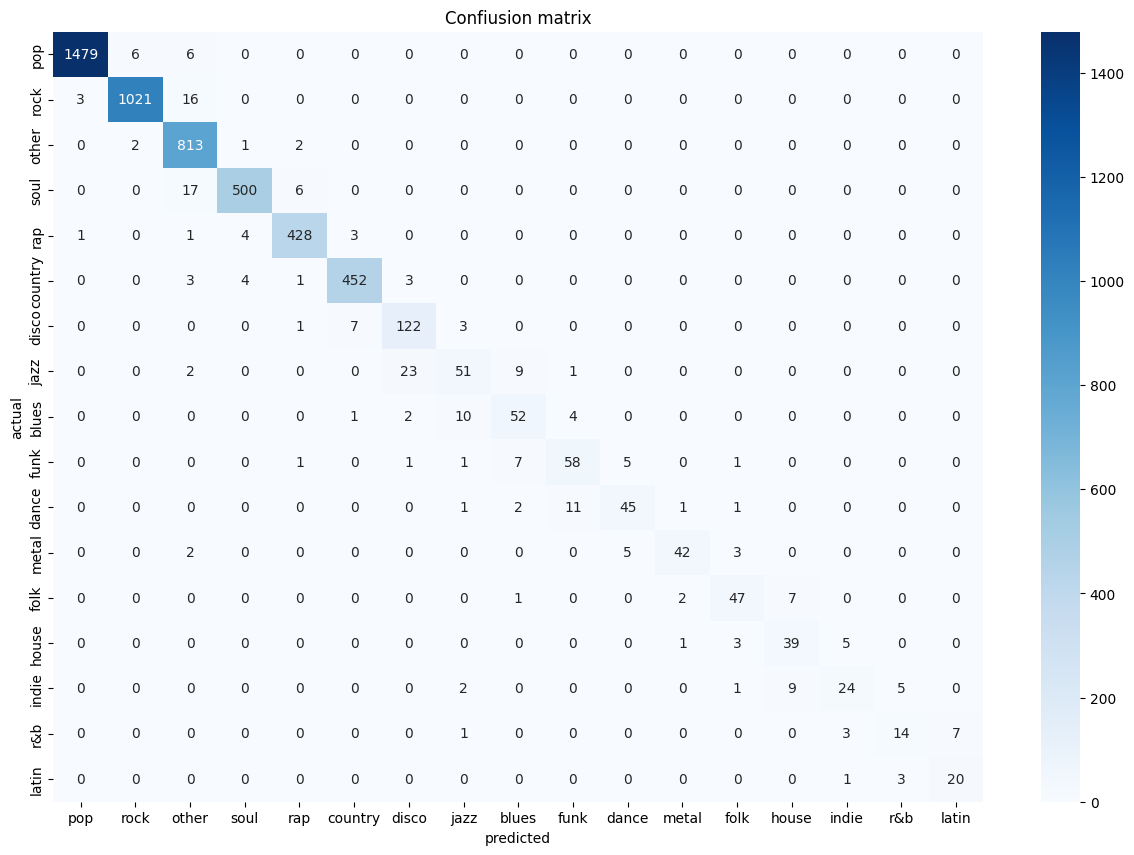

In [12]:

# confiusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (15,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dizio_main, yticklabels=dizio_main)
plt.title('Confiusion matrix')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In order to solve this problem related to the differences in the number of observation for classes, we try to apply a technique SMOTE (Synthetic Minority Over-sampling TEchnique) in order to weight the classes based on thier numerosity.

# **SMOTE** (Synthetic Minority Over-sampling Technique)

Regularization Technique

In [13]:
from collections import Counter #is use for verifie balancing

In [14]:
smote = SMOTE(random_state=42)
x_train_bal, y_train_bal = smote.fit_resample(x_train, y_train)


In [15]:
svm_balance = SVC(kernel='rbf',C=1) 
# we use the RADIAL BASICS FUNTION as a kernel
# C is our regualization parameter

# we initialize the SVM
svm_balance.fit(x_train_bal, y_train_bal)

c:\Users\lovoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1)

In [16]:
y_pred_bal = svm_balance.predict(x_test)

In [17]:
print(classification_report(y_test, y_pred_bal, target_names=dizio_main))

              precision    recall  f1-score   support

         pop       1.00      0.99      1.00      1491
        rock       0.99      0.99      0.99      1040
       other       0.97      1.00      0.98       818
        soul       0.99      0.98      0.99       523
         rap       0.99      0.99      0.99       437
     country       1.00      0.99      0.99       463
       disco       0.95      0.98      0.97       133
        jazz       0.94      0.93      0.94        86
       blues       0.94      0.94      0.94        69
        funk       0.97      0.95      0.96        74
       dance       0.97      0.98      0.98        61
       metal       1.00      0.90      0.95        52
        folk       0.93      1.00      0.97        57
       house       0.98      0.98      0.98        48
       indie       0.95      0.90      0.93        41
         r&b       0.96      0.92      0.94        25
       latin       1.00      1.00      1.00        24

    accuracy              

We can finally notice that almost all the observation are well classified, and now even the classes with less observation have a value of the f1_ score near to 1

## Confusion Matrix with SMOTE

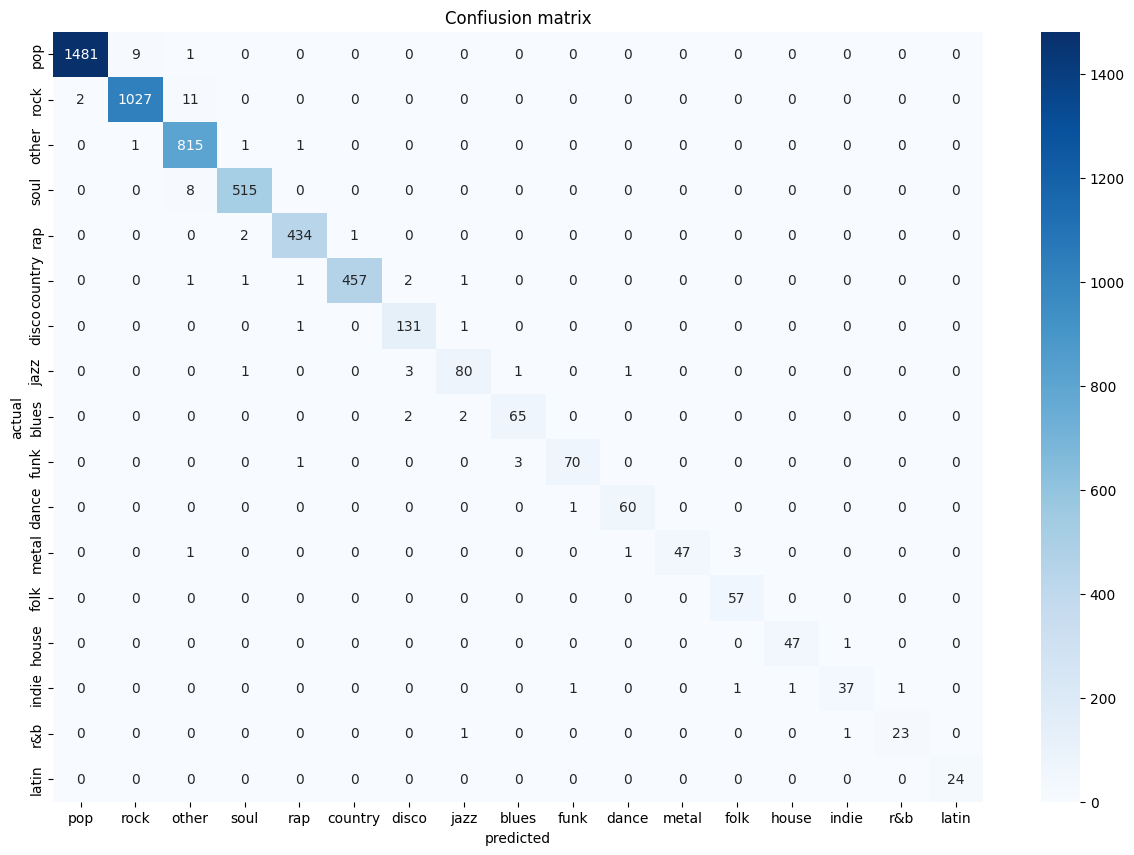

In [18]:
# confiusion matrix
cm_bal = confusion_matrix(y_test, y_pred_bal)

plt.figure(figsize = (15,10))
sns.heatmap(cm_bal, annot=True, fmt='d', cmap='Blues', xticklabels=dizio_main, yticklabels=dizio_main)
plt.title('Confiusion matrix')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()